## Import libraries 

In [32]:
import warnings
import os
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.trees import dtreeviz
from IPython.core.display import display, HTML

C:\Users\Alberto Ciacci\AppData\Local\Temp\ipykernel_13392\663646412.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Preliminary tasks

* Disable FutureWarning alerts.
* Include the system environment variables paths required to visualized decision trees through the Graphviz framework.

In [2]:
warnings.simplefilter(action='ignore', category=FutureWarning)
graphviz_path = os.pathsep + "C:\Program Files\Graphviz\bin"
if graphviz_path not in os.environ["PATH"]:
    os.environ["PATH"] += graphviz_path

## Load the Iris dataset 

From Wikipedia:

The Iris flower data set or Fisher Iris data set is a multivariate data set used and made famous by 
the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements 
in taxonomic problems as an example of linear discriminant analysis.It is sometimes called 
Anderson Iris data set because Edgar Anderson collected the data to quantify the morphologic variation 
of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula 
"all from the same pasture, and picked on the same day and measured at the same time  by the same person 
with the same apparatus".

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). 
Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 
Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species 
from each other. Fisher's paper was published in the Annals of Eugenics (today the Annals of Human Genetics) 
and includes discussion of the contained techniques' applications to the field of phrenology.

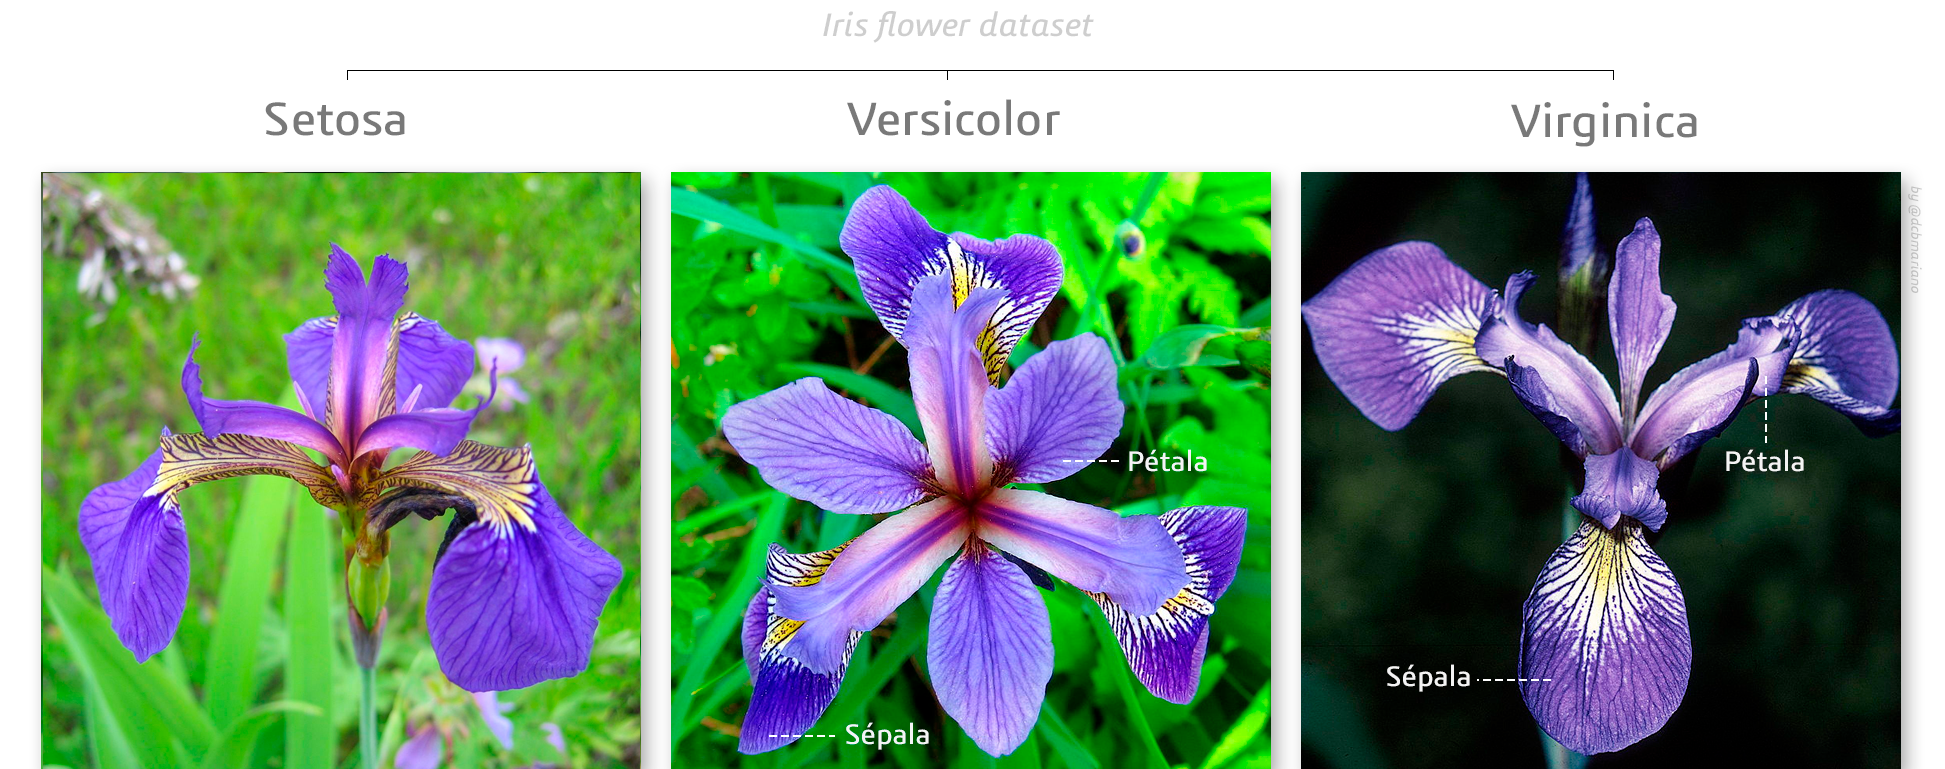

Source: https://commons.wikimedia.org/wiki/File:Flores_de_%C3%8Dris.png

In [3]:
# Load the iris dataset from seaborn
iris_df = sns.load_dataset("iris")
# Print dataset head
iris_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Visualize static relationships between features and targets

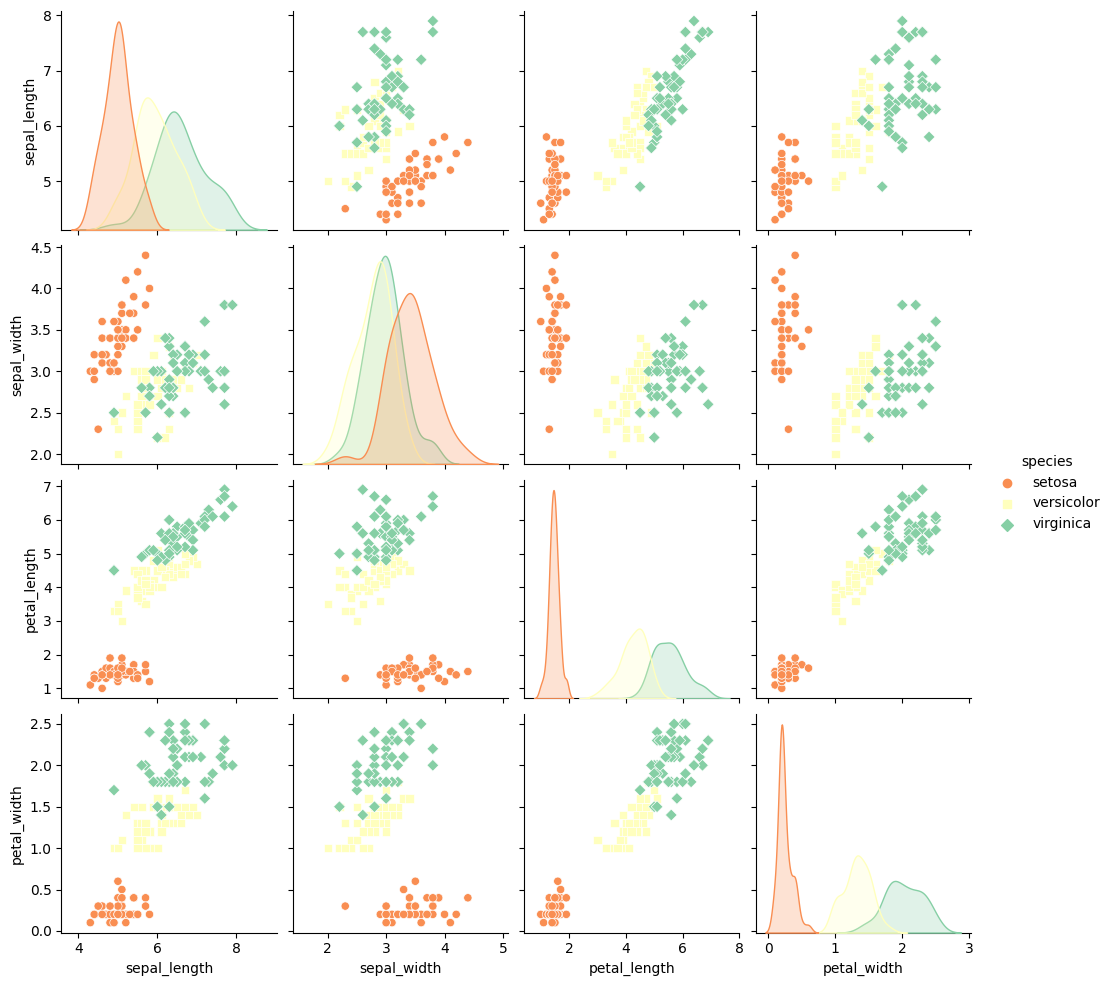

In [4]:
# Build a pairplot to visualize the static relationships between predictors and targets
sns.pairplot(iris_df, hue="species", palette="Spectral", markers=["o", "s", "D"])

## Build a simple decision tree classifier

In [5]:
# Format the dataset to make it compatible with a scikit-learn decision tree model
X = iris_df.drop(["species"], axis=1).values
y = iris_df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
# Build a tree model classifier object
clf = tree.DecisionTreeClassifier()
# Fit the model
clf = clf.fit(X, y)

## Plot a diagram of the decision tree model

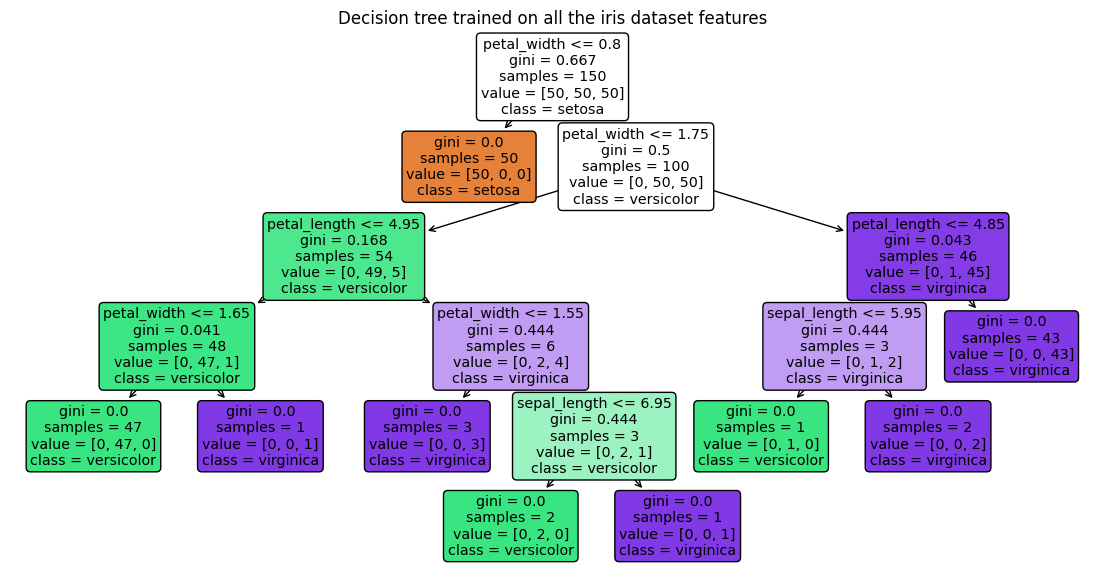

In [6]:
# Plot the decision tree model trained on all the iris dataset features
plt.figure(figsize=(14,7))
tree.plot_tree(clf, feature_names=list(iris_df.columns)[:-1], class_names=list(iris_df["species"].unique()),
               filled=True, rounded=True)
plt.title("Decision tree trained on all the iris dataset features")
plt.show()

## Plot a diagram of the decision tree model via dtreeviz

In [34]:
# Plot the decision tree model trained on all the iris dataset features
viz = dtreeviz(clf, X, y, target_name="species", feature_names=list(iris_df.columns)[:-1],
               class_names=list(iris_df["species"].unique()))
display(HTML(viz.svg()))